Data shape: (100, 4)

First few rows:
   videos_watched  assignments_submitted  forum_posts completed
0              11                      6            5       yes
1              43                      1           11        no
2              37                      1            8        no
3              18                      4           14       yes
4               6                      4           15       yes

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   videos_watched         100 non-null    int64 
 1   assignments_submitted  100 non-null    int64 
 2   forum_posts            100 non-null    int64 
 3   completed              100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None

Data summary statistics:
       videos_watched  assignments_submitted  forum_posts
count      100.000

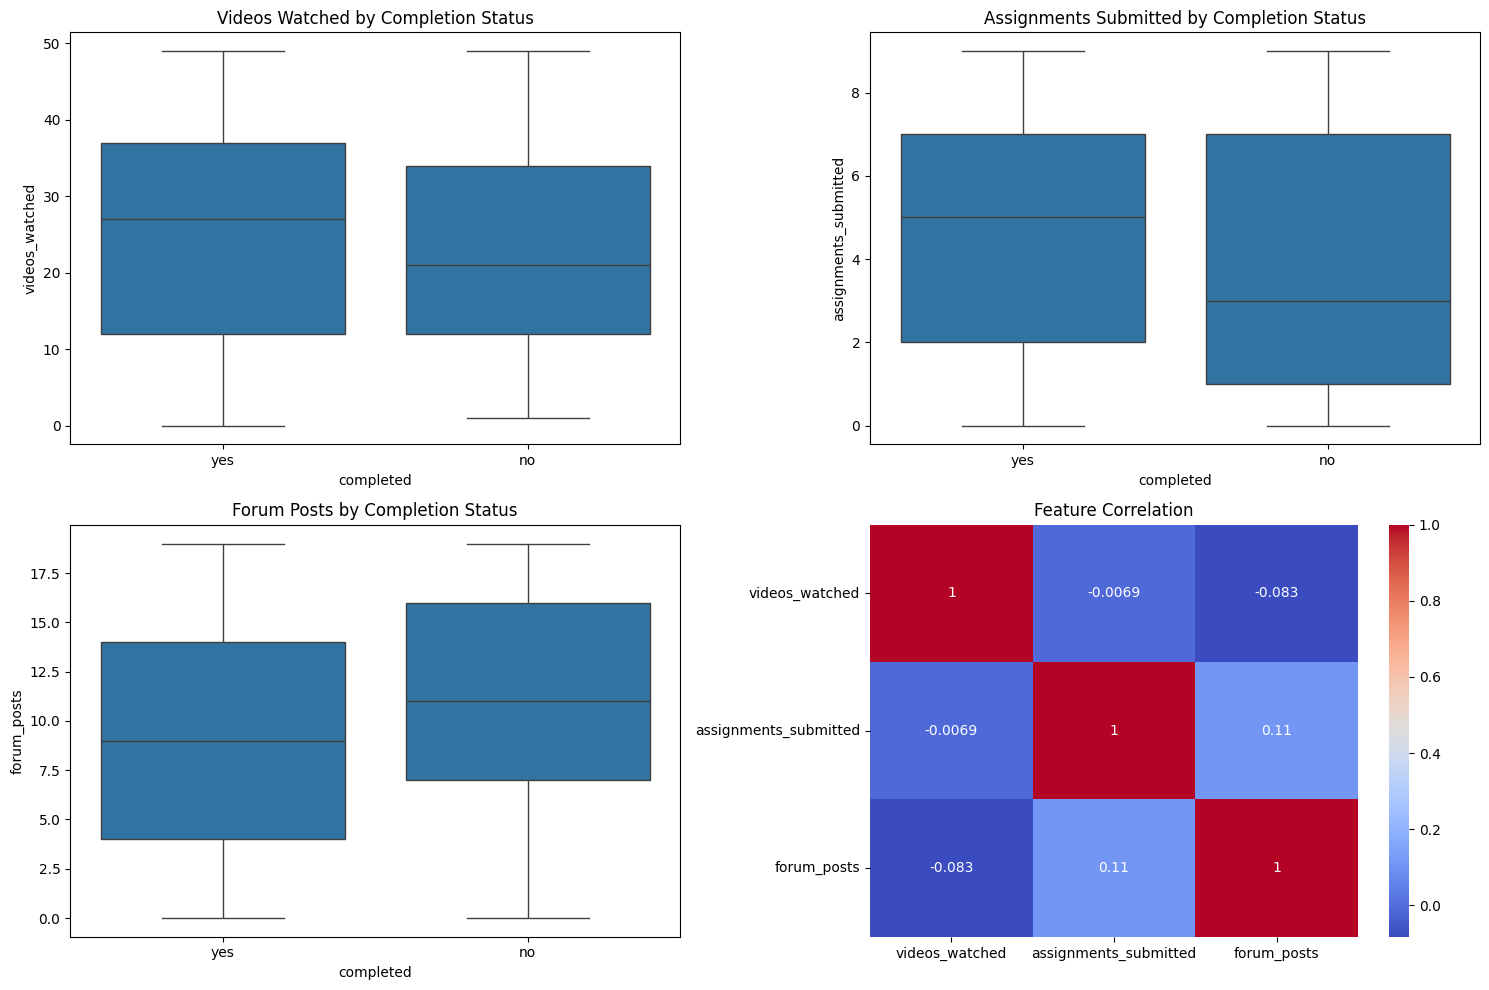


Logistic Regression Cross-Validation Accuracy: 0.5857 ± 0.0948
Logistic Regression Test Accuracy: 0.5333

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.55      0.46        11
           1       0.67      0.53      0.59        19

    accuracy                           0.53        30
   macro avg       0.53      0.54      0.52        30
weighted avg       0.57      0.53      0.54        30


Random Forest Cross-Validation Accuracy: 0.5143 ± 0.0833
Random Forest Test Accuracy: 0.5333

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.55      0.46        11
           1       0.67      0.53      0.59        19

    accuracy                           0.53        30
   macro avg       0.53      0.54      0.52        30
weighted avg       0.57      0.53      0.54        30


SVM Cross-Validation Accuracy: 0.4571 ± 0.0969
SVM Test Accuracy: 0.4667

Classification Report:


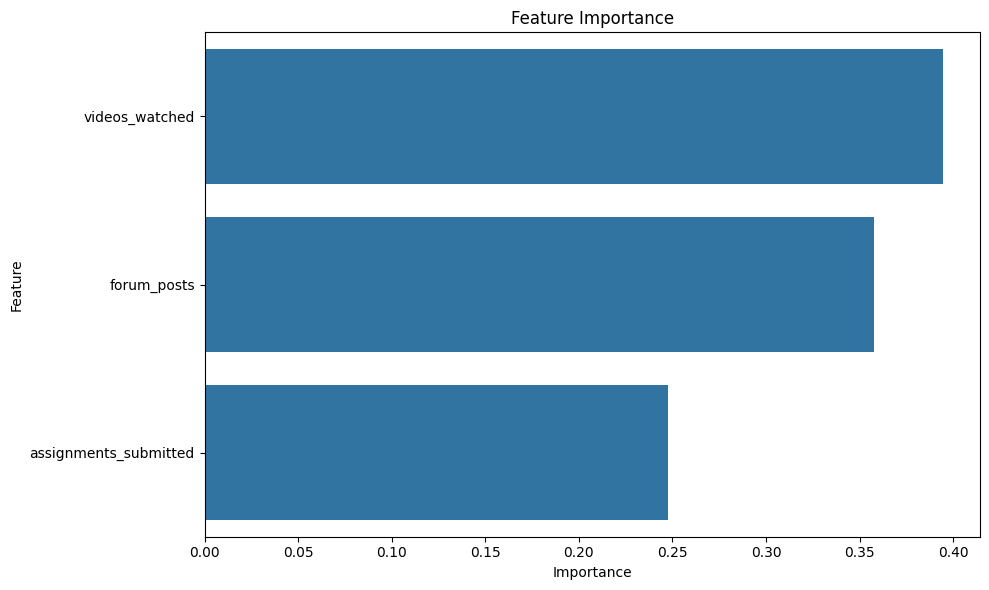


Feature Importance:
                 Feature  Importance
0         videos_watched    0.394621
2            forum_posts    0.357689
1  assignments_submitted    0.247689

Example Predictions:
Student who watched 40 videos, submitted 7 assignments, and made 15 forum posts:
Prediction: no
Completion probability: 0.50

Student who watched 5 videos, submitted 1 assignments, and made 2 forum posts:
Prediction: no
Completion probability: 0.45

Student who watched 20 videos, submitted 5 assignments, and made 10 forum posts:
Prediction: no
Completion probability: 0.46



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


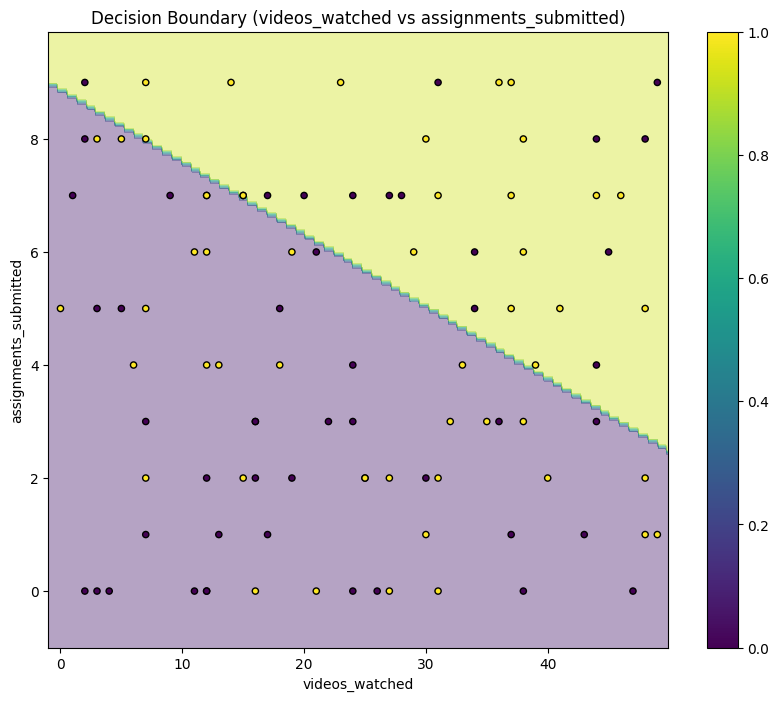


Model Training and Evaluation Complete!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Load the data
data = pd.read_csv('online_learning.csv')

# Data exploration
print("Data shape:", data.shape)
print("\nFirst few rows:")
print(data.head())

print("\nData info:")
print(data.info())

print("\nData summary statistics:")
print(data.describe())

print("\nClass distribution:")
print(data['completed'].value_counts())

# Data preprocessing
# Convert 'completed' to binary values
data['completed_binary'] = data['completed'].map({'yes': 1, 'no': 0})

# Visualize the features
plt.figure(figsize=(15, 10))

# Feature distributions by completion status
plt.subplot(2, 2, 1)
sns.boxplot(x='completed', y='videos_watched', data=data)
plt.title('Videos Watched by Completion Status')

plt.subplot(2, 2, 2)
sns.boxplot(x='completed', y='assignments_submitted', data=data)
plt.title('Assignments Submitted by Completion Status')

plt.subplot(2, 2, 3)
sns.boxplot(x='completed', y='forum_posts', data=data)
plt.title('Forum Posts by Completion Status')

plt.subplot(2, 2, 4)
sns.heatmap(data.drop(['completed', 'completed_binary'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')

plt.tight_layout()
plt.savefig('feature_analysis.png')
plt.show()

# Prepare data for modeling
X = data[['videos_watched', 'assignments_submitted', 'forum_posts']]
y = data['completed_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train different models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"\n{name} Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Fit on training data
    model.fit(X_train_scaled, y_train)

    # Evaluate on test data
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }

# Select the best performing model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nBest Model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")

# Feature importance for Random Forest
if 'Random Forest' in models:
    rf_model = results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()

    print("\nFeature Importance:")
    print(feature_importance)

# Create a function for making predictions on new data
def predict_completion(videos, assignments, forum_posts, model=best_model, scaler=scaler):
    """
    Predict whether a student will complete the course based on their activity.

    Parameters:
    videos (int): Number of videos watched
    assignments (int): Number of assignments submitted
    forum_posts (int): Number of forum posts made

    Returns:
    str: 'yes' if the model predicts completion, 'no' otherwise
    float: probability of completion
    """
    new_data = np.array([[videos, assignments, forum_posts]])
    new_data_scaled = scaler.transform(new_data)

    pred = model.predict(new_data_scaled)[0]

    try:
        prob = model.predict_proba(new_data_scaled)[0][1]
        return 'yes' if pred == 1 else 'no', prob
    except:
        return 'yes' if pred == 1 else 'no', None

# Example usage of the prediction function
examples = [
    {'videos': 40, 'assignments': 7, 'forum_posts': 15},
    {'videos': 5, 'assignments': 1, 'forum_posts': 2},
    {'videos': 20, 'assignments': 5, 'forum_posts': 10}
]

print("\nExample Predictions:")
for example in examples:
    completion, probability = predict_completion(
        example['videos'],
        example['assignments'],
        example['forum_posts']
    )

    print(f"Student who watched {example['videos']} videos, submitted {example['assignments']} " +
          f"assignments, and made {example['forum_posts']} forum posts:")
    print(f"Prediction: {completion}")
    if probability is not None:
        print(f"Completion probability: {probability:.2f}")
    print()

# Decision boundary visualization (for 2 features)
# Let's visualize videos_watched vs assignments_submitted
def plot_decision_boundary(model, X, y, features, scaler):
    """
    Plot the decision boundary for a model
    """
    # Set min and max values with some padding
    x_min, x_max = X[features[0]].min() - 1, X[features[0]].max() + 1
    y_min, y_max = X[features[1]].min() - 1, X[features[1]].max() + 1

    # Create a meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Prepare the meshgrid points for prediction
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # For the third feature, use the median value (assuming we're visualizing 2 out of 3 features)
    if len(features) == 2 and X.shape[1] > 2:
        third_feature_median = X.iloc[:, 2].median()
        grid_points_with_median = np.column_stack([grid_points, np.full(grid_points.shape[0], third_feature_median)])
        Z = model.predict(scaler.transform(grid_points_with_median))
    else:
        Z = model.predict(scaler.transform(grid_points))

    # Reshape Z back to the meshgrid shape
    Z = Z.reshape(xx.shape)

    # Plot the contour
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[features[0]], X[features[1]], c=y, s=20, edgecolor='k')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(f'Decision Boundary ({features[0]} vs {features[1]})')
    plt.colorbar()
    plt.savefig('decision_boundary.png')
    plt.show()

# Plot decision boundary for videos watched vs assignments submitted
plot_features = ['videos_watched', 'assignments_submitted']
plot_decision_boundary(best_model, X, y, plot_features, scaler)

print("\nModel Training and Evaluation Complete!")